MATHEURISTIC SENSITIVITY ANALYSIS

Imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from MTSP_DS_MILP_Solver import MTSP_DS_MILP_Solver
from MTSP_DS_Matheuristic_Solver import MTSP_DS_Matheuristic_Solver
from TourUtils import plotTours


Parameters:
m: number of drone stations
Dn: number of drones for each drone station
Kn: number of trucks

In [ ]:
m = 2 
Dn = 2
Kn = 2

In [ ]:
def compute_average_solution(n, num_trials, solver_type):
    execTimes = []
    for i in range(num_trials):
        if solver_type == "MILP":
            solver = MTSP_DS_MILP_Solver(n, m, Dn, Kn)
        else:
            solver = MTSP_DS_Matheuristic_Solver(n, m, Dn, Kn)

        solver.solve()
        solver.save_nodes_location_to_file("test_locations")
        execTime = solver.getExecTime()
        # solver.printExecutionLog()
        execTimes.append(execTime)
        if solver_type == "MILP":
            plotTours(solver.getModel(), solver.v, solver.eps)
    average_exec_time = np.mean(execTimes, axis=0)
    return average_exec_time


def plot_results_for_n(values, num_trials=1, solver = "MILP"):
    average_solutions = []
    for n in values:
        average_solution = compute_average_solution(n, num_trials, solver)
        average_solutions.append(average_solution)

    plt.plot(values, average_solutions, marker='o')
    plt.xlabel('Number of Nodes (n)')
    plt.ylabel('Average Execution time')
    plt.title('Average MTSP Execution Time for Different Number of Nodes')
    plt.grid(True)
    # plt.savefig('mtsp_ds_sensitivityAnalysis.png')
    plt.show()

MILP method call:

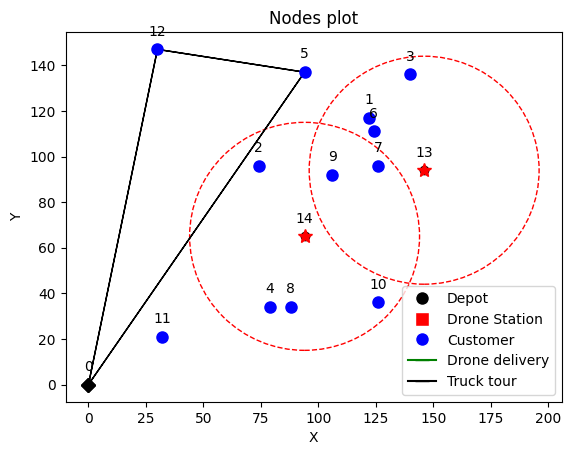

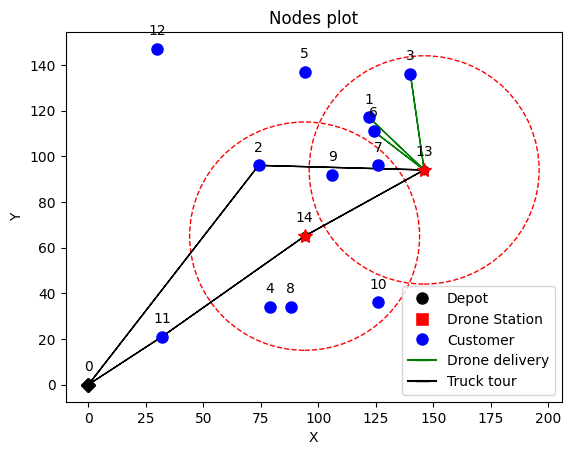

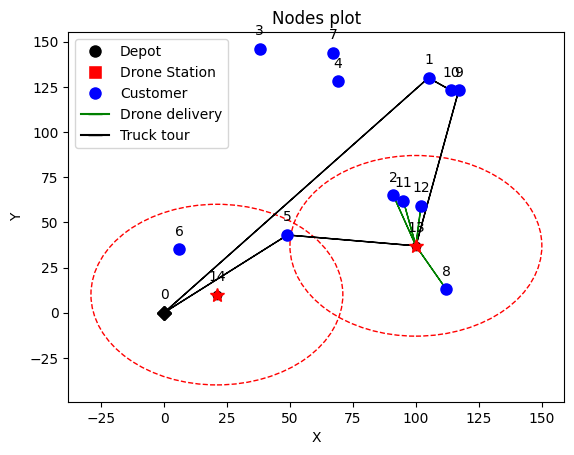

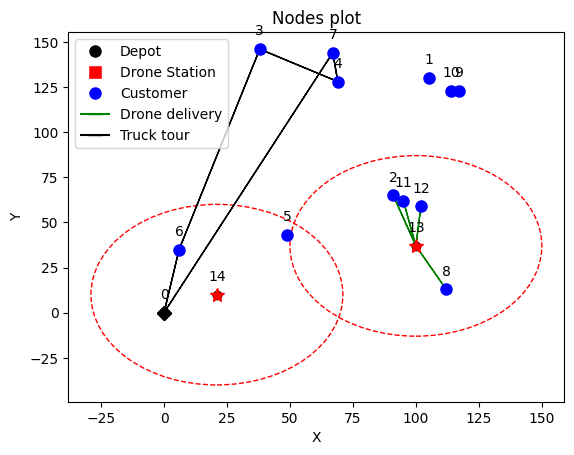

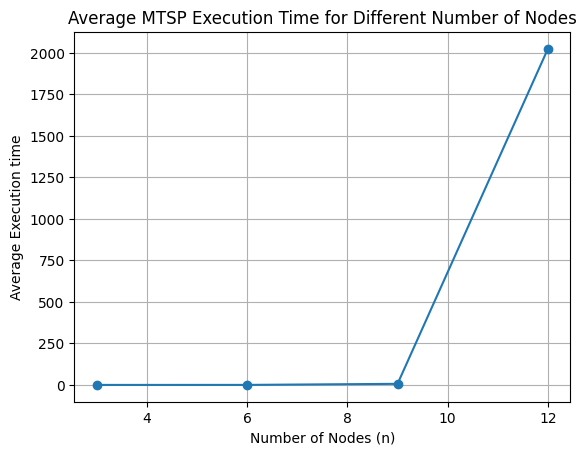

In [14]:
n_values = [3,6,9,12]
plot_results_for_n(n_values, num_trials=3, solver="MILP")

Matheuristic method call:

In [15]:
# plot_results_for_n(n_values, num_trials=3, solver="MATHEURISTIC")